In [1]:
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras import Model
from tensorflow.keras.layers import Conv2D, Dense, Dropout, Flatten, MaxPooling2D, Input, Rescaling
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split

In [2]:
! unzip /content/shipsnet.json.zip

Archive:  /content/shipsnet.json.zip
  inflating: shipsnet.json           


In [3]:
def create_dataset():
    df = pd.read_json('/content/shipsnet.json')
    images = []
    for img in df.data:
        images.append(np.array(img).reshape(3,80,80).transpose((1,2,0)))
    labels = np.array(df.labels).astype(np.int64)
    return np.array(images), labels
X, y = create_dataset()

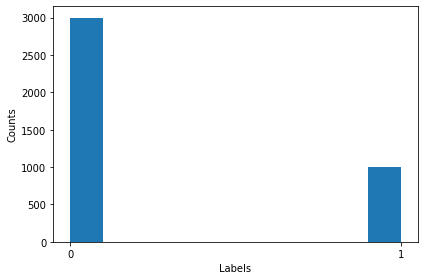

In [4]:
_, ax = plt.subplots()
plt.hist(y)
ax.set_xticks([0,1])
ax.set_xlabel("Labels")
ax.set_ylabel("Counts")
plt.tight_layout()
plt.show()

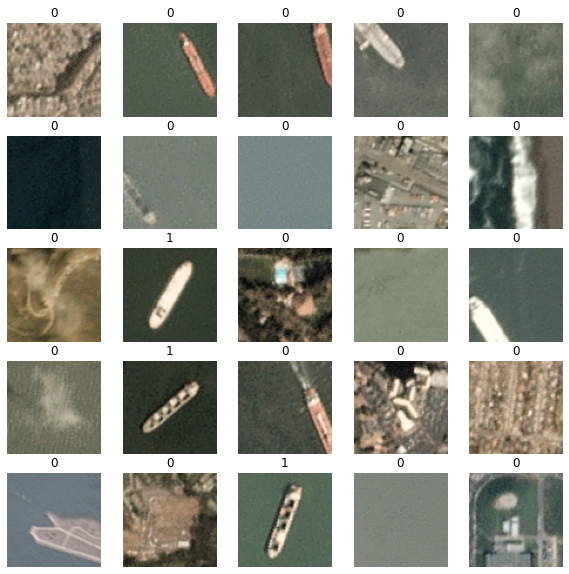

In [5]:
f, axes = plt.subplots(5, 5, figsize=(10,10))
for ax in axes.flatten():
    idx = np.random.randint(0, X.shape[0])
    ax.imshow(X[idx])
    ax.set_title(y[idx])
    ax.axis('off')
plt.show()

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


In [7]:
inputs = Input(shape=(80, 80, 3))
x = Rescaling(1.0/255.0)(inputs)
x = Conv2D(64, 3, activation="relu", name='conv_1')(x)
x = MaxPooling2D(pool_size=(2,2), name='pool_1')(x)
x = Conv2D(64, 3, activation="relu", name='conv_2')(x)
x = MaxPooling2D(pool_size=(2,2), name='pool_2')(x)
x = Conv2D(64, 3, activation="relu", name='conv_3')(x)
x = MaxPooling2D(pool_size=(2,2), name='pool_3')(x)
x = Flatten(name='flatten')(x)
x = Dense(64, name='dense_1')(x)
x = Dropout(0.5, name='dropout')(x)
outputs = Dense(1, activation="sigmoid", name='output')(x)

In [8]:
model = Model(inputs, outputs, name="Ship_Classification")


In [9]:
model.compile(optimizer=Adam(), loss="binary_crossentropy", metrics=['accuracy'])
model.summary()

Model: "Ship_Classification"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 80, 80, 3)]       0         
                                                                 
 rescaling (Rescaling)       (None, 80, 80, 3)         0         
                                                                 
 conv_1 (Conv2D)             (None, 78, 78, 64)        1792      
                                                                 
 pool_1 (MaxPooling2D)       (None, 39, 39, 64)        0         
                                                                 
 conv_2 (Conv2D)             (None, 37, 37, 64)        36928     
                                                                 
 pool_2 (MaxPooling2D)       (None, 18, 18, 64)        0         
                                                                 
 conv_3 (Conv2D)             (None, 16, 16, 64)

In [10]:
history = model.fit(X_train, y_train, epochs=20, validation_split=0.33)


Epoch 1/20
57/57 [==============================] - 33s 550ms/step - loss: 0.4163 - accuracy: 0.8345 - val_loss: 0.3012 - val_accuracy: 0.8893
Epoch 2/20
57/57 [==============================] - 31s 549ms/step - loss: 0.2777 - accuracy: 0.8925 - val_loss: 0.1988 - val_accuracy: 0.9220
Epoch 3/20
57/57 [==============================] - 30s 536ms/step - loss: 0.2382 - accuracy: 0.9053 - val_loss: 0.1955 - val_accuracy: 0.9175
Epoch 4/20
57/57 [==============================] - 30s 535ms/step - loss: 0.1911 - accuracy: 0.9292 - val_loss: 0.2247 - val_accuracy: 0.9141
Epoch 5/20
57/57 [==============================] - 31s 543ms/step - loss: 0.1869 - accuracy: 0.9220 - val_loss: 0.1136 - val_accuracy: 0.9627
Epoch 6/20
57/57 [==============================] - 30s 525ms/step - loss: 0.1423 - accuracy: 0.9499 - val_loss: 0.1039 - val_accuracy: 0.9627
Epoch 7/20
57/57 [==============================] - 30s 525ms/step - loss: 0.1436 - accuracy: 0.9476 - val_loss: 0.1304 - val_accuracy: 0.9503